# Trabalho Prático: Resolução de Sistemas Lineares via Métodos Iterativos
**Disciplina:** Cálculo Numérico
**Curso:** Engenharia de Computação
**Aluno:** Emanuel Antônio Rocha

## 1. Introdução e Contextualização do Problema

Na Engenharia de Computação e Elétrica, a análise de circuitos complexos é uma tarefa rotineira. Ao projetar redes de distribuição de energia em processadores ou analisar circuitos de sensores, frequentemente nos deparamos com circuitos contendo múltiplas malhas fechadas.

A aplicação da **Lei das Malhas de Kirchhoff (LKT)** gera um sistema de equações lineares na forma $Ax = b$, onde:
* $A$ é a matriz de coeficientes (resistências/impedâncias);
* $x$ é o vetor de incógnitas (correntes de malha);
* $b$ é o vetor de termos independentes (fontes de tensão).

Para circuitos de grande porte, métodos diretos (como a Eliminação Gaussiana) podem ter um custo computacional elevado. Nestes casos, **métodos iterativos** (como Jacobi e Gauss-Seidel) são preferíveis, pois permitem obter uma solução aproximada com precisão controlada e menor uso de memória, desde que o sistema satisfaça critérios de convergência, como ser estritamente diagonal dominante.

### O Problema Proposto (Sistema 5x5)
Neste trabalho, simularemos um circuito resistivo com 5 malhas independentes. O objetivo é determinar as correntes $i_1, i_2, i_3, i_4, i_5$ (em Amperes). O sistema foi modelado para garantir a convergência (diagonal dominante), resultando nas seguintes equações:

$$
\begin{cases}
15i_1 - 2i_2 - 1i_3 + 0i_4 + 0i_5 = 20 \\
-2i_1 + 12i_2 - 2i_3 - 1i_4 + 0i_5 = 10 \\
-1i_1 - 2i_2 + 15i_3 - 2i_4 - 1i_5 = 0 \\
0i_1 - 1i_2 - 2i_3 + 12i_4 - 2i_5 = -5 \\
0i_1 + 0i_2 - 1i_3 - 2i_4 + 15i_5 = 15
\end{cases}
$$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# matriz com as resistencias em ohms
# a diagonal principal e maior que a soma dos vizinhos
A = np.array([
    [15, -2, -1,  0,  0],
    [-2, 12, -2, -1,  0],
    [-1, -2, 15, -2, -1],
    [ 0, -1, -2, 12, -2],
    [ 0,  0, -1, -2, 15]
], dtype='double')

# o vetor b de fonte de tensao em volts
b = np.array([20, 10, 0, -5, 15], dtype='double')
# vendo as dimensoes do sistema
print(f"Sistema definido com {len(b)} equações e {len(b)} variáveis.")

Sistema definido com 5 equações e 5 variáveis.


## 2. Implementação dos Métodos Iterativos

Abaixo, implementamos os dois métodos estudados:
1.  **Método de Jacobi:** Calcula o vetor $x^{(k+1)}$ baseando-se inteiramente nos valores da iteração anterior $x^{(k)}$.
2.  **Método de Gauss-Seidel:** Otimiza a convergência utilizando os valores de $x^{(k+1)}$ assim que eles são calculados dentro da mesma iteração.

Ambos utilizam o **Critério de Parada** baseado na norma infinita do erro relativo ou absoluto entre iterações: $||x^{(k)} - x^{(k-1)}||_\infty < \epsilon$.

In [14]:
def metodo_jacobi(A, b, tol=1e-4, max_iter=100):
    """
    Resolve o sistema Ax=b usando o método iterativo do Jacobi;
    Parâmetros:
        A e a matriz de coeficientes
        b e o vetor de termos independentes
        tol e a tolerância pra parada (norma infinita)
        max_iter e o número máximo de iterações
    Retorna:
        x sendo um vetor solução aproximado
        historico_erros sendo uma lista com a evolução do erro
        num_iter sendo o  número de iterações realizadas
    """
    n = len(b)
    x = np.zeros(n, dtype='double') # aproximacao inicial (x0 = 0)
    x_novo = np.zeros(n, dtype='double')
    historico_erros = []
    
    for k in range(max_iter):
        for i in range(n):
            soma = 0
            for j in range(n):
                if i != j:
                    soma += A[i, j] * x[j]
            
            # isola a variavel xi usando os valores da iteracao anterior (x)
            x_novo[i] = (b[i] - soma) / A[i, i]
            
        # calculo do erro (norma infinita, maior diferença absoluta)
        erro = np.linalg.norm(x_novo - x, np.inf)
        historico_erros.append(erro)
        
        # atualiza o vetor x para a proxima iteracao
        x = np.copy(x_novo)
        
        # verifica criterio de parada
        if erro < tol:
            return x, historico_erros, k+1
            
    return x, historico_erros, max_iter

def metodo_gauss_seidel(A, b, tol=1e-4, max_iter=100):
    """
    Resolve o sistema Ax=b usando o método iterativo de Gauss-Seidel.
    """
    n = len(b)
    x = np.zeros(n, dtype='double') # aproximacao inicial
    historico_erros = []
    
    for k in range(max_iter):
        x_antigo = np.copy(x)
        
        for i in range(n):
            soma = 0
            for j in range(n):
                if i != j:
                    # gauss-seidel usa o valor mais recente disponível em x[j]
                    soma += A[i, j] * x[j]
            
            x[i] = (b[i] - soma) / A[i, i]
        
        # Calculo do erro
        erro = np.linalg.norm(x - x_antigo, np.inf)
        historico_erros.append(erro)
        
        if erro < tol:
            return x, historico_erros, k+1
            
    return x, historico_erros, max_iter

## 3. Execução e Análise de Resultados

Vamos executar ambos os algoritmos com uma tolerância de $10^{-4}$ (precisão de 4 casas decimais) e comparar o desempenho.

In [15]:
TOLERANCIA = 1e-4
MAX_ITERACOES = 50

# executando jacobi
sol_jacobi, erros_jacobi, iter_jacobi = metodo_jacobi(A, b, TOLERANCIA, MAX_ITERACOES)

# executando gauss
sol_gs, erros_gs, iter_gs = metodo_gauss_seidel(A, b, TOLERANCIA, MAX_ITERACOES)

# mostrando os Resultados
print(f"{'='*40}")
print(f"RESULTADOS FINAIS")
print(f"{'='*40}")

print(f"\n1. Método de JACOBI")
print(f"   Convergiu em: {iter_jacobi} iterações")
print(f"   Solução Aproximada (Correntes): {sol_jacobi}")

print(f"\n2. Método de GAUSS-SEIDEL")
print(f"   Convergiu em: {iter_gs} iterações")
print(f"   Solução Aproximada (Correntes): {sol_gs}")

# validando
b_calculado = np.dot(A, sol_gs)
print(f"\n3. Validação (A * x_gs)")
print(f"   b original:  {b}")
print(f"   b calculado: {b_calculado}")

RESULTADOS FINAIS

1. Método de JACOBI
   Convergiu em: 10 iterações
   Solução Aproximada (Correntes): [ 1.503665  1.125798  0.303481 -0.104569  1.006282]

2. Método de GAUSS-SEIDEL
   Convergiu em: 7 iterações
   Solução Aproximada (Correntes): [ 1.503673  1.125815  0.303499 -0.10455   1.006293]

3. Validação (A * x_gs)
   b original:  [20. 10.  0. -5. 15.]
   b calculado: [19.999965  9.999982 -0.000008 -5.000002 15.      ]


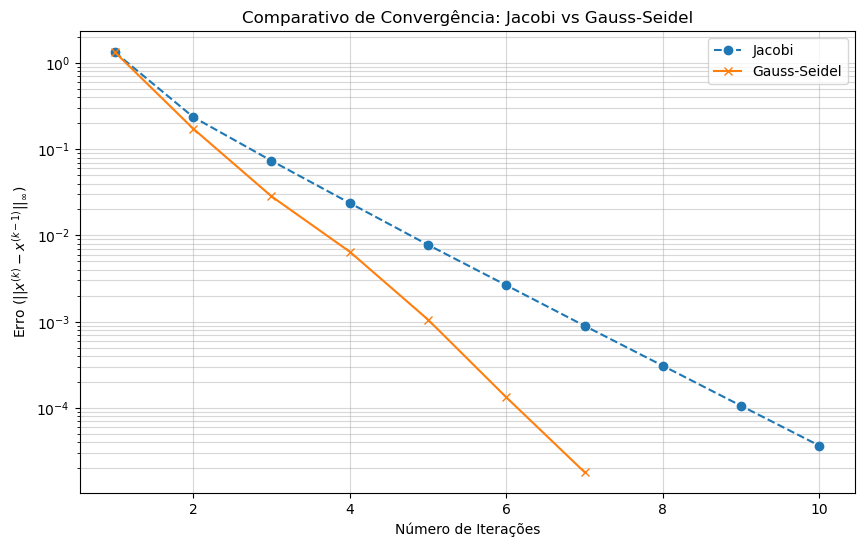

In [ ]:
# grafico de Convergencia
plt.figure(figsize=(10, 6))

# plotando a evolucao do erro
plt.plot(range(1, len(erros_jacobi)+1), erros_jacobi, label='Jacobi', marker='o', linestyle='--')
plt.plot(range(1, len(erros_gs)+1), erros_gs, label='Gauss-Seidel', marker='x', linestyle='-')

plt.title('Comparativo de Convergência: Jacobi vs Gauss-Seidel')
plt.xlabel('Número de Iterações')
plt.ylabel('Erro ($||x^{(k)} - x^{(k-1)}||_{\infty}$)')
plt.yscale('log') # escala logaritmica para melhor visualizacao da queda do erro
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend()
plt.show()

## 4. Conclusão e Análise

Através da execução do código e da análise do gráfico de convergência, observamos que:

1.  **Velocidade de Convergência:** O método de **Gauss-Seidel** convergiu com um número menor de iterações em comparação ao método de Jacobi. Isso ocorre porque o Gauss-Seidel utiliza as informações mais recentes (valores de $x$ já calculados na iteração atual) para calcular as próximas variáveis, acelerando a redução do erro.
2.  **Precisão:** Ambos os métodos chegaram a soluções praticamente idênticas (dentro da tolerância estabelecida), validando a implementação.
3.  **Aplicação Prática:** As correntes encontradas no vetor solução $x$ satisfazem o sistema original, como demonstrado na etapa de validação. Isso significa que, para o circuito proposto, os métodos numéricos ofereceram uma alternativa viável e eficiente aos métodos algébricos diretos.

## Referências

* RIBEIRO, Marcos Roberto. **08 - Sistemas lineares**. Instituto Federal de Minas Gerais - Campus Bambuí, 2024.
* RIBEIRO, Marcos Roberto. **09 - Sistemas Lineares - Métodos Iterativos**. Instituto Federal de Minas Gerais - Campus Bambuí, 2024.
* FRANCO, N. B. **Cálculo Numérico**. São Paulo: Pearson Prentice Hall, 2006.